# EDA

## 1. Análisis del mercado vitivinícola

Vamos a empezar este análisis hablando sobre el mercado de vinos en España.

In [1]:
# Importamos librerías y el dataset de vinos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

vinos = pd.read_csv("data/vinos_ESP.csv")
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9406 entries, 0 to 9405
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clase          9406 non-null   object 
 1   Bodega         9406 non-null   object 
 2   Año            9406 non-null   int64  
 3   Vino_ID        9406 non-null   int64  
 4   Vino           9406 non-null   object 
 5   Rating         9406 non-null   float64
 6   Nº_reseñas     9406 non-null   int64  
 7   Precio         9406 non-null   float64
 8   Región         9406 non-null   object 
 9   Categoría      9406 non-null   object 
 10  Sello_calidad  9406 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 808.5+ KB


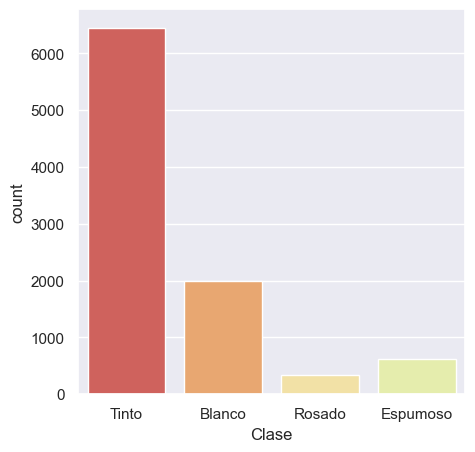

In [3]:
##########################################################################################################
##########################################   CLASES DE VINO   ############################################
##########################################################################################################
'''Empezamos viendo la participación en el mercado de las distintas clases de vino que serán objeto de estudio:
            --> Tinto
            --> Blanco
            --> Rosado
            --> Espumoso'''

sns.set(palette="Spectral", color_codes=True)
plt.figure(figsize=(5,5))
sns.countplot(x=vinos["Clase"]); 

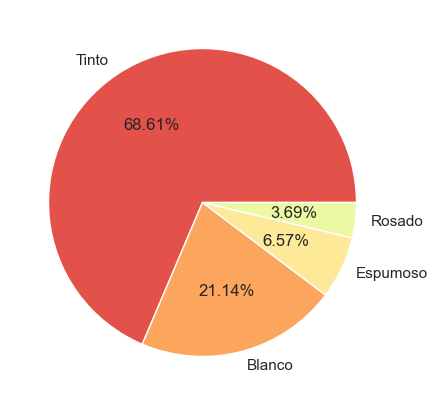

In [6]:
data = vinos["Clase"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(data.values,
        labels=data.index,
        autopct= "%.2f%%");

## Categorías de Vino

Los distintos vinos se clasifican en diferentes categorías en función de la edad, es decir, el tiempo que ha permanecido envejeciendo tanto en barrica como en botella. Esta clasificación variará según se trate de una clase de vino u otra, siendo especialmente importante en el vino tinto. Además, hay que tener presente que cada D.O. establece sus características particulares; sin embargo, a efectos de este análisis nos guiaremos por una clasificación general.

#### Categorías de Vino Tinto
Atendiendo a lo anterior, distinguimos las siguientes categorías, que van de menor a mayor tiempo de envejecimiento:

            * Joven --> no pasan tiempo en barrica; el de la cosecha
            * Roble --> tiempo total entre barrica y botella 9 meses
            * Crianza --> tiempo total entre barrica y botella 24 meses
            * Reserva --> tiempo total entre barrica y botella 48 meses
            * Gran Reserva --> tiempo total entre barrica y botella 60 meses

#### Categorías de Vino Blanco y Rosado
En esta ocasión, los tiempos de envejecimiento difieren con respecto a la clase anterior, por lo que se tienen las siguientes categorías, pues no es tan común en estos vinos la crianza en barrica:

            * Reserva --> tiempo total 24 meses
            * Gran reserva --> tiempo total 36 meses
            
#### Categorías de Vino Espumoso
Por último, los vinos espumosos no atienden a las categorías mencionadas; sino que se clasifican por su método de elaboracion en:

            * Non-vintage --> elaboración con mezcla de añadas para conservar la calidad año tras año
            * Vintage

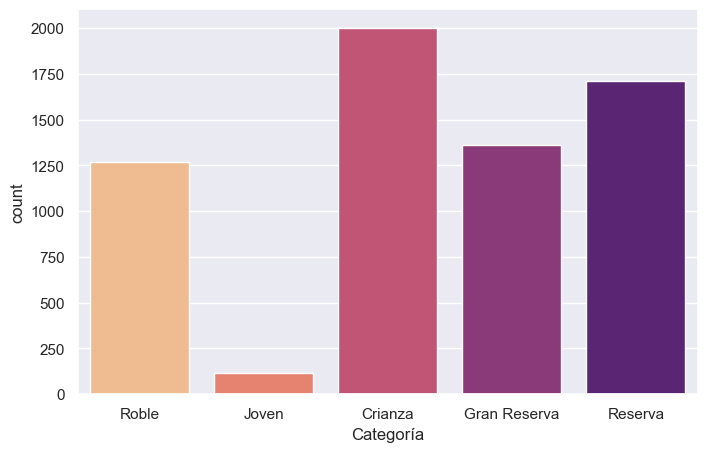

In [49]:
##########################################################################################################
#############################################   CATEGORÍA   ##############################################
##########################################################################################################

''' Todos los vinos que no estén sujetos a ninguna de las categorías anteriores estarán designados
    como "Sin determinar"
'''
cat_tintos = vinos[vinos["Clase"]=="Tinto"]["Categoría"]

sns.set(palette="magma_r", color_codes=True)
plt.figure(figsize=(8,5))
sns.countplot(x=cat_tintos);

In [8]:
# NO GRÁFICA, dada la gran desproporción (pasar la tabla a excel)

cat_blancos = vinos[vinos["Clase"]=="Blanco"]["Categoría"]
cat_blancos.value_counts().to_frame()

,Categoría
Sin determinar,1966
Reserva,15
Roble,3
Crianza,3
Gran Reserva,1


In [9]:
# NO GRÁFICA, dada la gran desproporción

cat_rosados = vinos[vinos["Clase"]=="Rosado"]["Categoría"]
cat_rosados.value_counts().to_frame()

,Categoría
Sin determinar,345
Gran Reserva,2


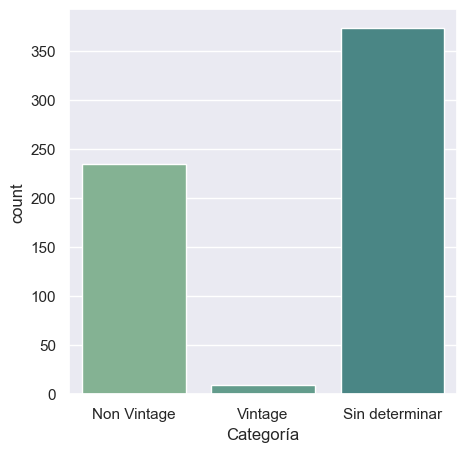

In [10]:
cat_espumosos = vinos[vinos["Clase"]=="Espumoso"]["Categoría"]

sns.set(palette="crest", color_codes=True)
plt.figure(figsize=(5,5))
sns.countplot(x=cat_espumosos);

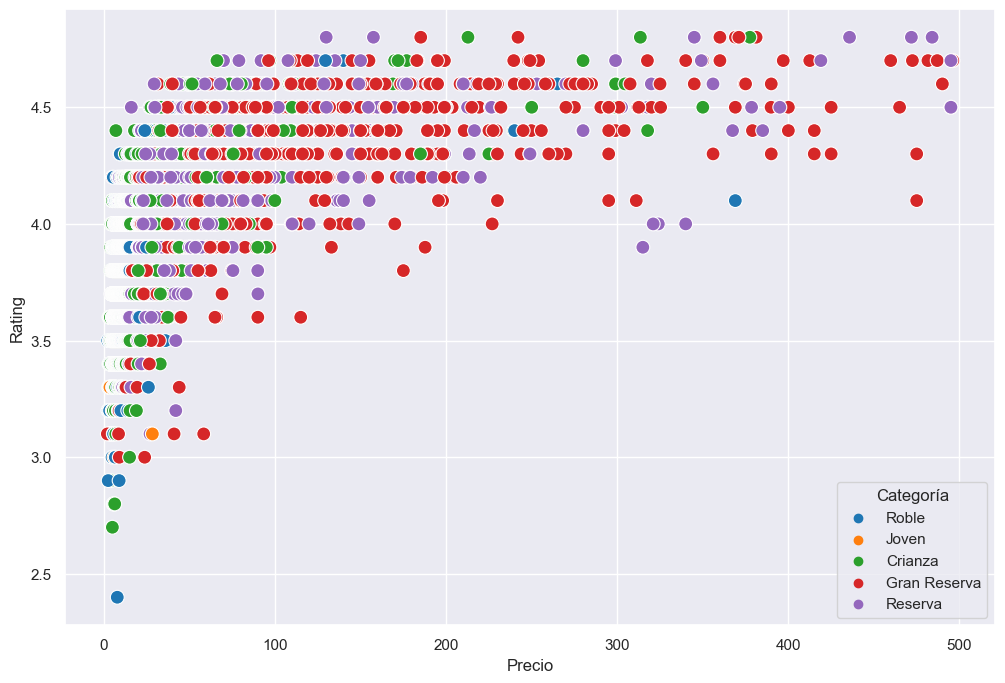

In [17]:
### Relación CATEGORÍA con el precio y el rating
# hacerlo de nuevo cuando hayamos filtrado los precios
plt.figure(figsize=(12,8))
sns.set(palette="tab10", color_codes=True)

sns.scatterplot(x = vinos[vinos.Clase == "Tinto"].Precio,
                y = vinos[vinos.Clase == "Tinto"].Rating,
                s = 100,
                hue = vinos[vinos.Clase == "Tinto"]["Categoría"]);

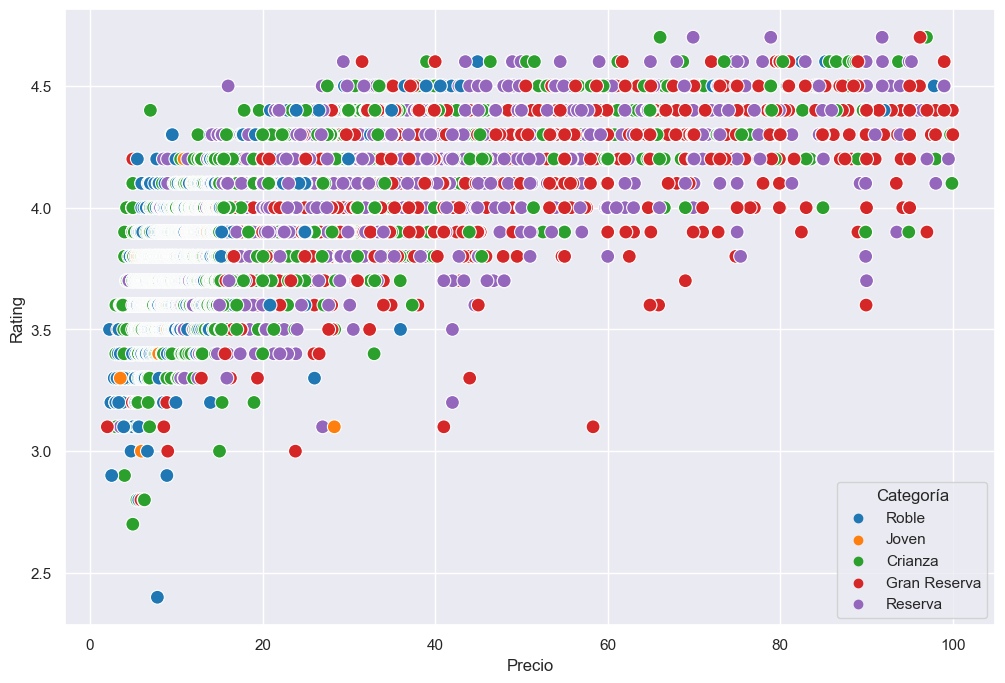

In [18]:
plt.figure(figsize=(12,8))
sns.set(palette="tab10", color_codes=True)

sns.scatterplot(x = vinos[(vinos.Clase == "Tinto") & (vinos.Precio <= 100)].Precio,
                y = vinos[vinos.Clase == "Tinto"].Rating,
                s = 100,
                hue = vinos[vinos.Clase == "Tinto"]["Categoría"]);



In [ ]:
##########################################################################################################
##############################################   REGIÓN   ################################################
##########################################################################################################

''' Ahora vamos a estudiar las regiones vitivinícolas de España.
    Tendremos que ver cuáles son las regiones con mayor número de vinos en el mercado;
    y comprobar si dichas regiones varían en función de la clase del vino'''

In [24]:
# ¿Cuántas regiones diferentes tenemos?
vinos["Región"].nunique()

104

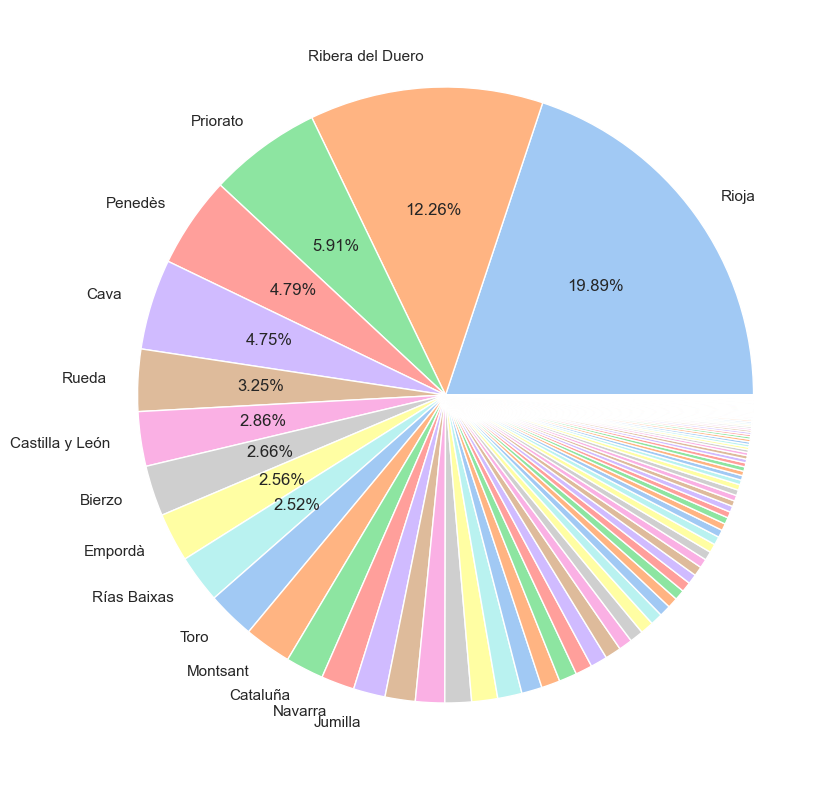

In [23]:
# Empezamos viendo una distribución del mercado por región
data = vinos["Región"].value_counts()

def my_labels(sizes,labels):
        etiquetas = [label if size>156 else "" for size,label in zip(sizes,labels)]
        return etiquetas

plt.figure(figsize=(10,10))
sns.set(palette="pastel", color_codes=True)

plt.pie(data.values,
        labels=my_labels(data.values,data.index),
        autopct= lambda pct:("%.2f%%" %pct) if pct>2.50 else "");


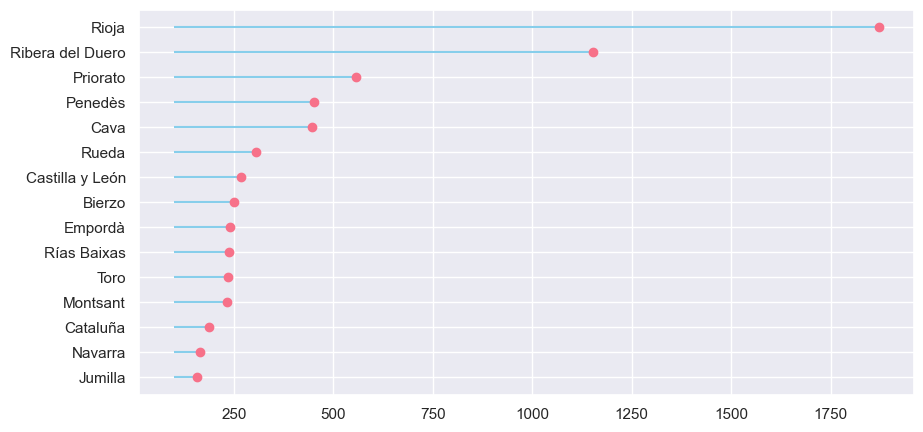

In [26]:
# Vemos pues el top 15 de las regiones con mayor cantidad de vinos
top15regiones = vinos["Región"].value_counts(ascending=True)[-15:]

plt.figure(figsize=(10,5))
sns.set(palette="husl", color_codes=True)
plt.hlines(y=top15regiones.index,
           xmin=100,
           xmax=top15regiones,
           color='skyblue')
plt.plot(top15regiones, top15regiones.index, "o");

In [32]:
# Top 10 de las regiones según la clase de vino

mercados_clase = vinos.groupby(["Clase","Región"])[["Vino"]].count().sort_values(by="Vino",ascending=False)
regiones_tinto = mercados_clase.groupby("Clase").get_group("Tinto")[:10]
regiones_tinto

Vino
Clase Región                
Tinto Rioja             1604
      Ribera del Duero  1119
      Priorato           512
      Toro               232
      Bierzo             202
      Montsant           197
      Castilla y León    177
      Empordà            154
      Penedès            147
      Jumilla            143

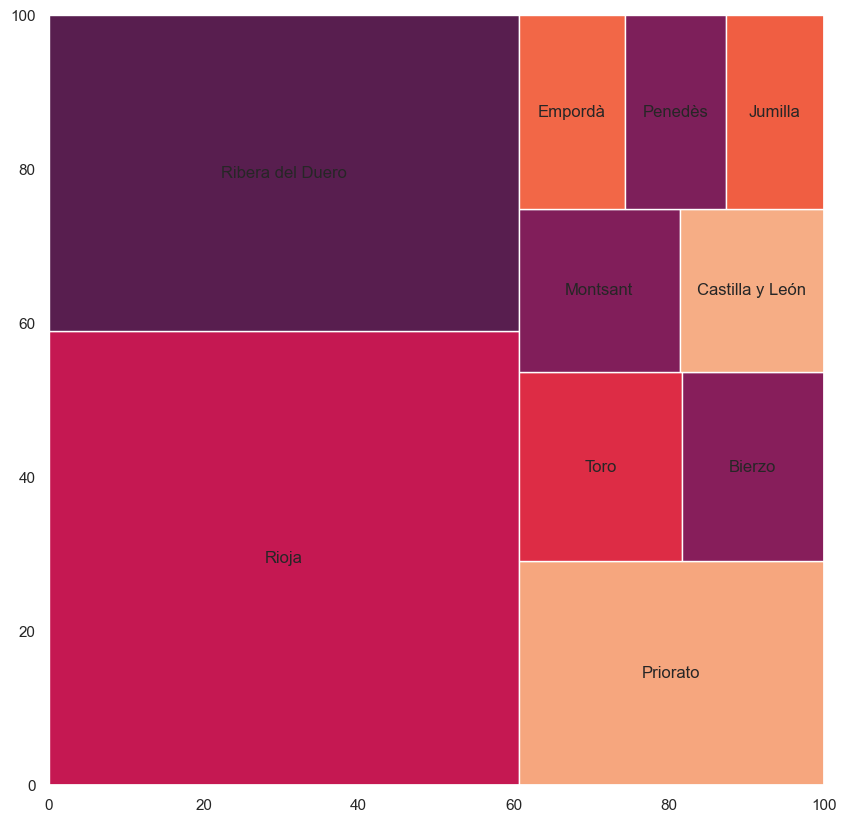

In [45]:
import squarify

plt.figure(figsize=(10,10))
sns.set(palette="flare", color_codes=True)
squarify.plot(sizes = regiones_tinto.reset_index().Vino, label = regiones_tinto.reset_index()["Región"]);

In [46]:
regiones_blanco = mercados_clase.groupby("Clase").get_group("Blanco")[:10]
regiones_blanco

Vino
Clase  Región                 
Blanco Rueda               300
       Rías Baixas         216
       Penedès             194
       Rioja               184
       Castilla y León      73
       Empordà              66
       Cataluña             57
       Ribeiro              57
       Valdeorras           55
       Costers del Segre    50

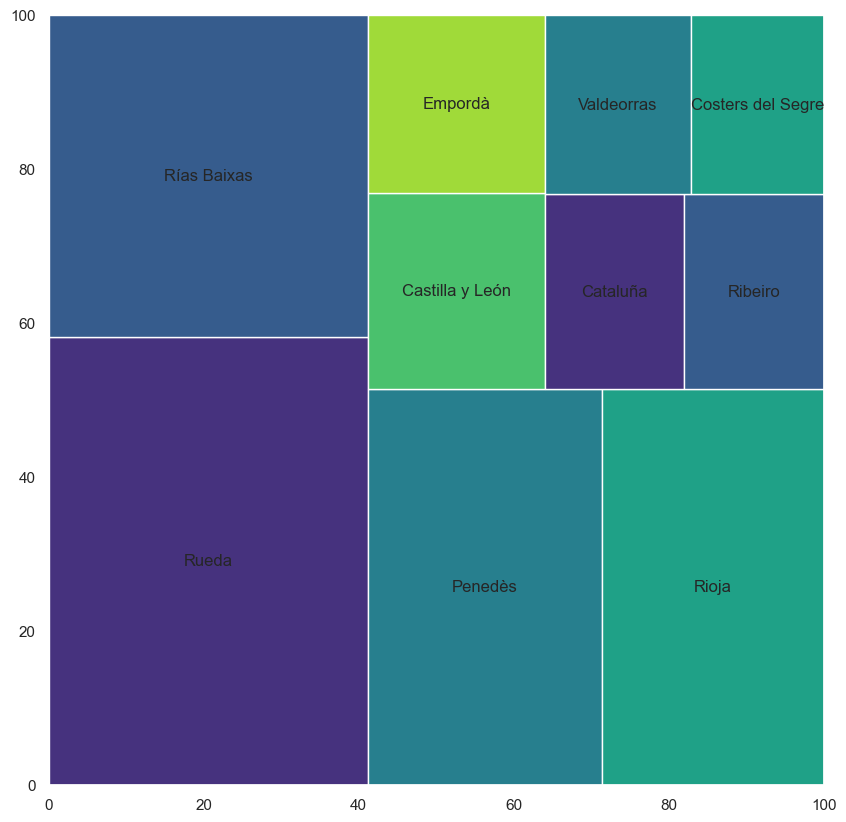

In [60]:
plt.figure(figsize=(10,10))
color = sns.color_palette("viridis")
squarify.plot(sizes = regiones_blanco.reset_index().Vino, label = regiones_blanco.reset_index()["Región"], color = color);

In [61]:
regiones_rosado= mercados_clase.groupby("Clase").get_group("Rosado")[:10]
regiones_rosado

Vino
Clase  Región                
Rosado Rioja               81
       Penedès             31
       Navarra             30
       Ribera del Duero    23
       Cataluña            20
       Empordà             17
       Castilla y León     11
       Cigales             11
       Montsant            11
       Somontano           11

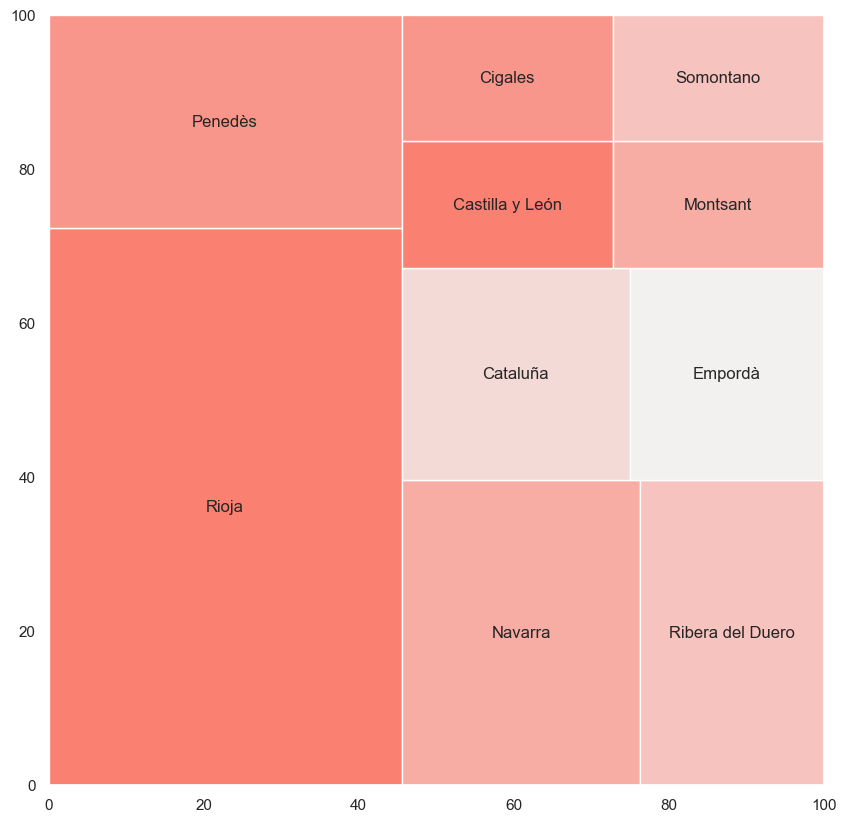

In [63]:
plt.figure(figsize=(10,10))
color = sns.color_palette("light:salmon_r")
squarify.plot(sizes = regiones_rosado.reset_index().Vino, label = regiones_rosado.reset_index()["Región"], color = color);

In [66]:
regiones_espumoso= mercados_clase.groupby("Clase").get_group("Espumoso")[:10]
regiones_espumoso

Vino
Clase    Región                 
Espumoso Cava                447
         Penedès              79
         Cataluña             33
         Valencia             10
         Castilla y León       8
         Castilla              6
         Vino de España        4
         Empordà               4
         Costers del Segre     4
         Rueda                 3

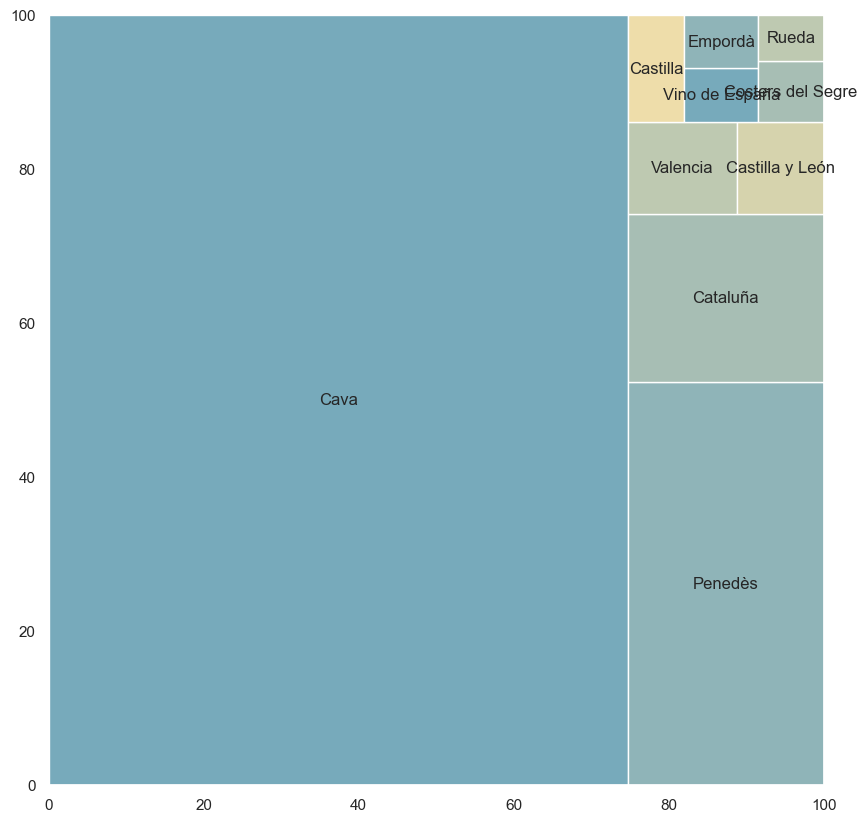

In [67]:
plt.figure(figsize=(10,10))
color = sns.color_palette("blend:#7AB,#EDA")
squarify.plot(sizes = regiones_espumoso.reset_index().Vino, label = regiones_espumoso.reset_index()["Región"], color = color);

In [ ]:
##########################################################################################################
##################################   SELLO DE CALIDAD/DENOMINACIÓN   #####################################
##########################################################################################################

# Factor íntimamente ligado con Región
''' 
Vamos a determinar si la región de procedencia del vino tiene D.O. (denominación de origen), 
ya que así podremos analizar la influencia de este factor.

Además de la D.O, existen otras expresiones tradicionales como son los Vinos de Pago, los Vinos de Calidad, 
así como la Indicación Geográfica Protegida.
'''

'''En España, actualmente, existen 69 D.O, 14 denominaciones de Vinos de Pago y 7 de Vinos de Calidad'''

In [81]:
# Vemos el sello de calidad del top15 de regiones

vinos[vinos["Región"].isin(top15regiones.index)].groupby(["Región","Sello_calidad"])[["Vino"]].count().sort_values(by="Vino",ascending=False)

,,Vino
Región,Sello_calidad,
Rioja,Denominación de Origen,1871
Ribera del Duero,Denominación de Origen,1153
Priorato,Denominación de Origen,556
Penedès,Denominación de Origen,451
Cava,Denominación de Origen,447
Rueda,Denominación de Origen,306
Castilla y León,Sin denominación,269
Bierzo,Denominación de Origen,250
Empordà,Denominación de Origen,241


In [10]:
sello_calidad = vinos.groupby(["Sello_calidad", "Región"])[["Vino"]].count().sort_values(by= "Vino",ascending=False)
sello_calidad.groupby("Sello_calidad").get_group("Vino de Calidad")


Vino
Sello_calidad   Región                   
Vino de Calidad Islas Canarias         13
                Sierra de Salamanca     6
                Cangas                  2
                Granada Sur-Oeste       1

In [11]:
sello_calidad.groupby("Sello_calidad").get_group("Vino de Pago")

Vino
Sello_calidad Región                    
Vino de Pago  Dominio de Valdepusa    28
              Dehesa del Carrizal     13
              El Terrerazo            12
              Arínzano                 7
              Pago Calzadilla          6
              Otazu                    4
              Campo de la Guardia      4
              Pago Florentino          3

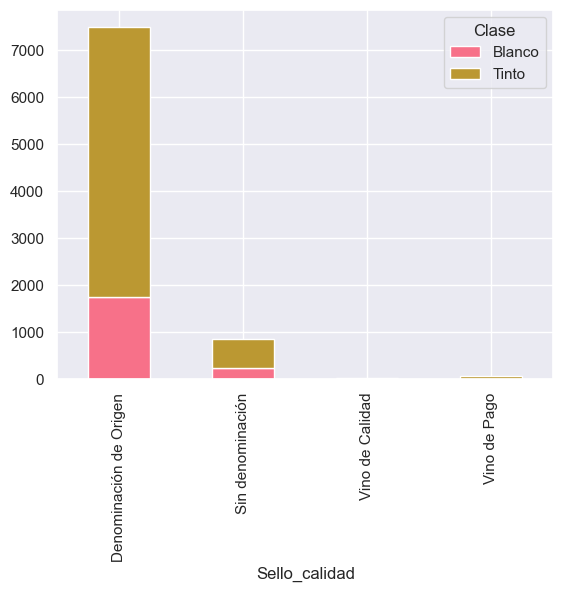

In [6]:
tinbla=vinos[(vinos.Clase == "Tinto") | (vinos.Clase == "Blanco")]
tinbla_plot = tinbla.groupby(['Clase', 'Sello_calidad']).size().reset_index().pivot(columns='Clase', index='Sello_calidad', values=0)

sns.set(palette = "husl", color_codes=True)
tinbla_plot.plot(kind='bar', stacked=True);

<Figure size 3000x1000 with 0 Axes>

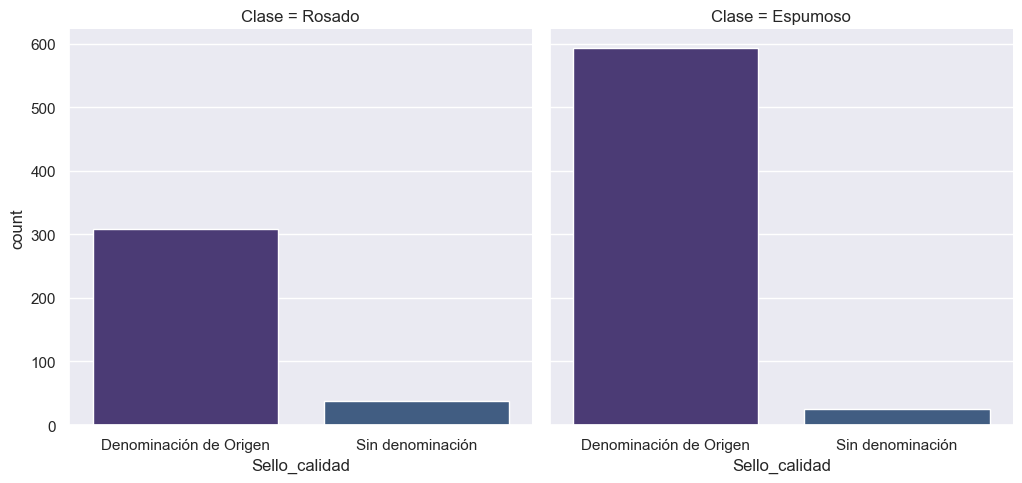

In [108]:
sin_tinbla=vinos[(vinos.Clase != "Tinto") & (vinos.Clase != "Blanco")]
plt.figure(figsize=(30,10));
color = sns.color_palette("viridis")
sns.catplot(x="Sello_calidad",
            col=("Clase"),
            col_wrap=4,
            data=sin_tinbla,
            kind="count",
            palette= color);


<Figure size 3000x1000 with 0 Axes>

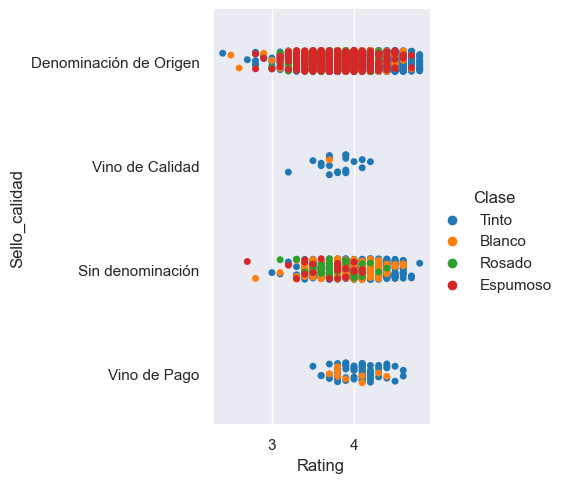

In [17]:
# Comprobamos q el distintivo de calidad nada tiene que ver con la calidad apreciada por los usuarios(rating)
# y más con asuntos administrativos/políticos

plt.figure(figsize=(30,10))
sns.set(palette = "tab10", color_codes=True)
sns.catplot(x = "Rating", y = "Sello_calidad", hue = "Clase", data = vinos);

In [ ]:
##########################################################################################################
#######################################      BODEGA      #################################################
##########################################################################################################

''' Otro dato a tener en cuenta es la BODEGA. 
    Tendremos que observar:
            --> Cuántas bodegas diferentes aparecen en el dataset
            --> Cuáles son las bodegas que disponen de más vinos en el mercado
            --> Las regiones de procedencia de las bodegas
            --> Qué bodegas son las más valoradas por los usuarios, '''

In [5]:
# Las bodegas diferentes que hay en el dataset
vinos.Bodega.nunique()

1666

In [10]:
# Las 20 bodegas con mayor nº de vinos en el mercado
vinos.Bodega.value_counts()[:20]

Familia Torres         96
Marqués de Riscal      71
Bodegas Faustino       54
Castillo Perelada      54
Artadi                 54
Muga                   53
Sierra Cantabria       50
Telmo Rodriguez        46
Marqués de Murrieta    44
Remírez de Ganuza      43
Bodegas Valdemar       42
Álvaro Palacios        42
Enate                  40
Juvé & Camps           39
Vega Sicilia           38
Gramona                37
Viñas del Vero         36
Protos                 36
Marqués de Cáceres     35
Martinet               35
Name: Bodega, dtype: int64

In [16]:
vinos.groupby(["Bodega","Región"])[["Vino"]].count().sort_values(by="Vino", ascending=False)[:20]

'''Al no coincidir con el anterior ranking, deducimos que hay bodegas con vinos procedentes de distintas
    regiones o denominaciones'''

,,Vino
Bodega,Región,
Bodegas Faustino,Rioja,50
Sierra Cantabria,Rioja,50
Marqués de Riscal,Rioja,50
Muga,Rioja,49
Castillo Perelada,Empordà,45
Artadi,Vino de España,45
Marqués de Murrieta,Rioja,44
Remírez de Ganuza,Rioja,43
Bodegas Valdemar,Rioja,41


In [13]:
# En esta tabla vemos las mejores bodegas en cuanto al rating (mediana), así como el precio y el nº de valoraciones
# Llama la atención la escasez de bodegas procedentes de la Rioja, dada su enorme penetración en el mercado

vinos.groupby(["Bodega","Región"])[["Rating", "Precio","Nº_reseñas"]].median().sort_values(by="Rating", ascending=False)[:20].reset_index()

,Bodega,Región,Rating,Precio,Nº_reseñas
0,Vega Sicilia,Ribera del Duero,4.70,287.700000,1222.5
1,Bodegas El Nido,Jumilla,4.70,137.250000,501.5
2,Recaredo,Cataluña,4.60,130.000000,38.0
3,Álvaro Palacios,Rioja,4.60,329.250000,63.0
4,Miguel Merino,Rioja Alta,4.60,39.000000,71.0
5,La Legua,Cigales,4.60,31.524180,47.0
6,Micro Bio (MicroBio),Vino de España,4.60,75.950000,40.0
7,Pago de Carraovejas,Ribera del Duero,4.50,91.807231,1165.0
8,Aalto,Ribera del Duero,4.50,72.850000,2060.5
9,Bodegas 6º Elemento - Vino Sexto Elemento,Utiel-Requena,4.50,29.350000,48.0


In [2]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go 


In [6]:
'''
Las bodegas con una mediana de rating alto nos da una noción sobre la fama de esa bodega; por lo que,
a priori, un vino poco conocido pero amparado por un nombre de bodega de calidad, 
puede antojarse recomendable'''

# Ranking bodegas 
rank_bode = vinos.groupby(["Bodega","Región"])[["Rating", "Precio","Nº_reseñas"]].median().sort_values(by="Rating", ascending=False)[:20].reset_index()
popularidad = [resena for resena in rank_bode["Nº_reseñas"]]
precio = [(mediano/5) for mediano in rank_bode.Precio]

data = [
        {
            "y": rank_bode["Rating"],
            "x": rank_bode["Bodega"],
            "mode": "markers",
            "marker":{
                      "color": popularidad,
                      "size": precio,
                      "showscale": True
                      },
            "text":rank_bode["Región"]

        }
]

fig = go.Figure(data)
iplot(fig)

In [7]:
fig.write_html("ranking_bodegas.html")

In [14]:
########################################################################################################
############################################ CALIDAD ###################################################
########################################################################################################

''' El siguiente factor a analizar será la calidad.
    Para ello, nos apoyaremos en el rating que poseen los vinos en la web Vivino'''

vinos[["Rating"]].describe()

,Rating
count,9406.000000
mean,3.942515
std,0.306521
min,2.400000
25%,3.700000
50%,3.900000
75%,4.200000
max,4.800000


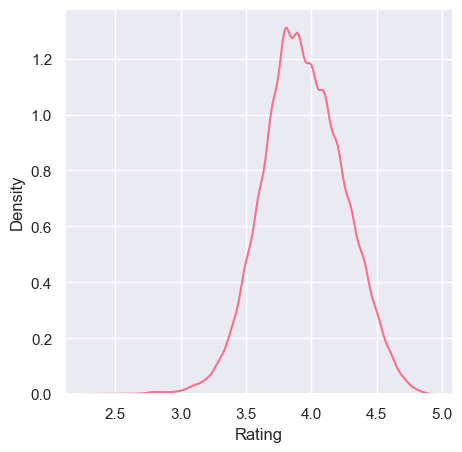

In [17]:
# Distribución de densidad del rating de todos los vinos
plt.figure(figsize=(5,5))
sns.set(palette = "husl", color_codes=True)
sns.kdeplot(vinos["Rating"]);

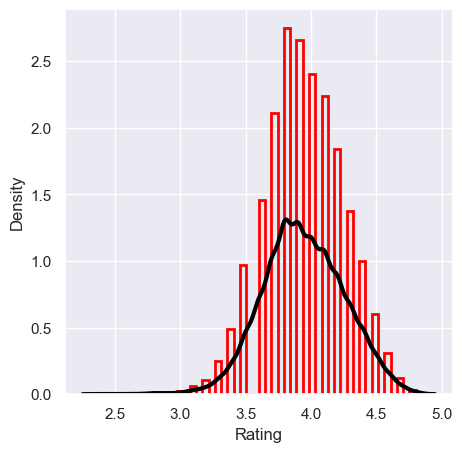

In [18]:
plt.figure(figsize=(5,5))
sns.distplot(vinos["Rating"],
             kde_kws={"color": "k", "lw":3, "label":"KDE"},
             hist_kws={"histtype": "step", "linewidth":2, "alpha":1, "color":"r"});

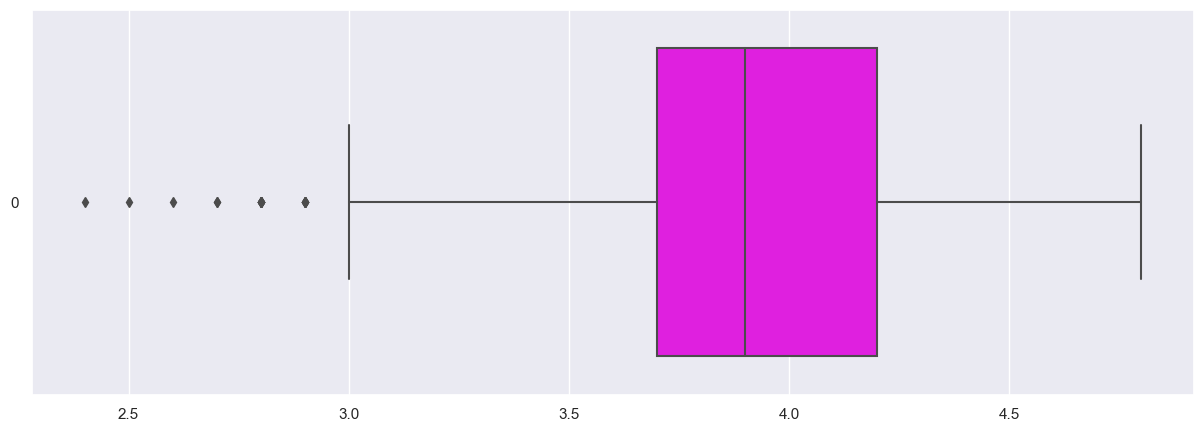

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(vinos["Rating"], color="magenta", orient= "h");

In [20]:
'''Los outliers por rating son por debajo del mínimo
    y, además, son muy pocos.
    
    Debido a la importancia de esta variable, esto funcionará como un filtro directo:
        --> se descartarán todos los vinos que no superen el corte'''

q1 = vinos.Rating.describe()[4]
q2 = vinos.Rating.describe()[5]
q3 = vinos.Rating.describe()[6]
IQRrating = q3 - q1

outliers_calidad = q1 - (1.5*IQRrating)
len(vinos[vinos["Rating"]<outliers_calidad])


19

In [21]:
filtro_cal = vinos.copy()
filtro_cal = filtro_cal[vinos.Rating>outliers_calidad]
filtro_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9387 entries, 0 to 9405
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clase          9387 non-null   object 
 1   Bodega         9387 non-null   object 
 2   Año            9387 non-null   int64  
 3   Vino_ID        9387 non-null   int64  
 4   Vino           9387 non-null   object 
 5   Rating         9387 non-null   float64
 6   Nº_reseñas     9387 non-null   int64  
 7   Precio         9387 non-null   float64
 8   Región         9387 non-null   object 
 9   Categoría      9387 non-null   object 
 10  Sello_calidad  9387 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 880.0+ KB


In [22]:
########### Desagregación por clases de vino:
filtro_cal.groupby("Clase")["Rating"].describe()

,count,mean,std,min,25%,50%,75%,max
Clase,,,,,,,,
Blanco,1983.0,3.870802,0.245956,3.0,3.7,3.9,4.0,4.7
Espumoso,614.0,3.804723,0.290290,3.0,3.6,3.8,4.0,4.7
Rosado,347.0,3.722190,0.251809,3.0,3.5,3.7,3.9,4.4
Tinto,6443.0,3.993031,0.307390,3.0,3.8,4.0,4.2,4.8


In [ ]:
##########################################################################################################
### FILTRO 1º ###
##########################################################################################################
'''Vamos a realizar un primer filtrado basándonos en 2 datos:
            1) Rating
                El rating de los vinos deberá ser mayor a la mediana según su clase
                
            2) Consistencia de la valoración
                Para considerar sólido el rating del vino, éste deberá fundamentarse en un mínimo de
                reseñas. Este mínimo será mayor al percentil25'''

In [23]:
### Rating
q2_tinrat = vinos[vinos["Clase"]=="Tinto"].Rating.median()
q2_blarat = vinos[vinos["Clase"]=="Blanco"].Rating.median()
q2_rosrat = vinos[vinos["Clase"]=="Rosado"].Rating.median()
q2_esprat = vinos[vinos["Clase"]=="Espumoso"].Rating.median()

### Consistencia
q1_tinres = np.percentile(vinos[vinos.Clase == "Tinto"]["Nº_reseñas"],25)
q1_blares = np.percentile(vinos[vinos.Clase == "Blanco"]["Nº_reseñas"],25)
q1_rosres = np.percentile(vinos[vinos.Clase == "Rosado"]["Nº_reseñas"],25)
q1_espres = np.percentile(vinos[vinos.Clase == "Espumoso"]["Nº_reseñas"],25)

### Filtrado
filtro_tintos = filtro_cal[(filtro_cal.Clase == "Tinto") & (filtro_cal.Rating>q2_tinrat) & (filtro_cal["Nº_reseñas"]>q1_tinres)]
filtro_blancos = filtro_cal[(filtro_cal.Clase == "Blanco") & (filtro_cal.Rating>q2_blarat) & (filtro_cal["Nº_reseñas"]>q1_blares)]
filtro_rosados = filtro_cal[(filtro_cal.Clase == "Rosado") & (filtro_cal.Rating>q2_rosrat) & (filtro_cal["Nº_reseñas"]>q1_rosres)]
filtro_espumosos = filtro_cal[(filtro_cal.Clase == "Espumoso") & (filtro_cal.Rating>q2_esprat) & (filtro_cal["Nº_reseñas"]>q1_espres)]


<Figure size 1000x500 with 0 Axes>

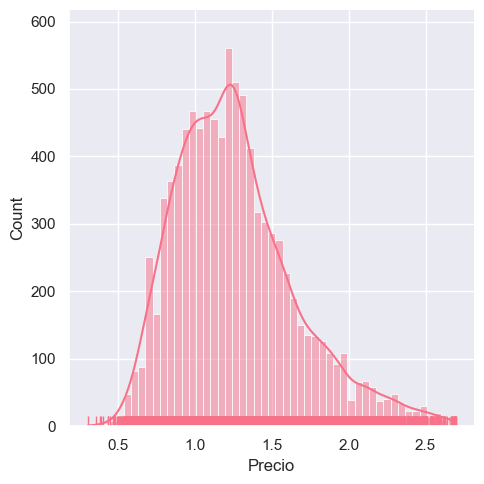

In [25]:
#########################################################################################################
##########################################  PRECIO  #####################################################
#########################################################################################################

''' Por último, tratamos el último factor determinante en nuestro análisis de vino: el precio.

    Evidentemente, existen muchas maneras de analizar el precio a la hora de valorar un vino;
    por tanto, empezaremos viendo la distribución de densidad en global, así como las distribuciones de precios
    para cada clase de vino.'''

plt.figure(figsize=(10,5))
sns.displot(np.log10(vinos["Precio"]),kde=True,rug=True);

In [26]:
vinos.Precio.describe()

count    9406.000000
mean       31.026018
std        48.937586
min         2.000000
25%         9.482500
50%        16.250000
75%        29.900000
max       496.100000
Name: Precio, dtype: float64

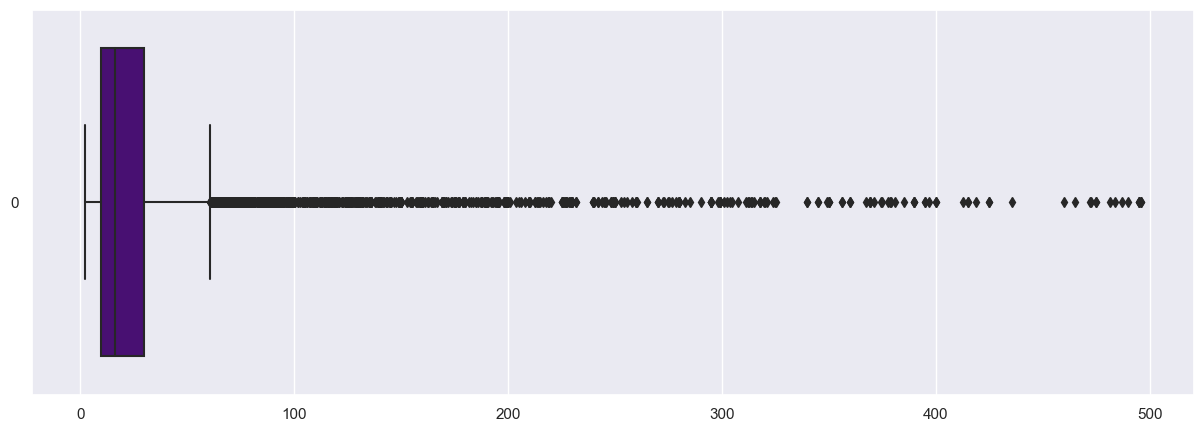

In [27]:
''' Vemos que hay muchísimos outliers por encima del máximo; y es que el sector del vino puede llegar a
    ser muy gourmet, de ahí los precios de casi 500 euros una botella de vino'''

plt.figure(figsize=(15,5))
sns.boxplot(vinos["Precio"], color="indigo", orient= "h");

In [28]:
# Desagregación de precio por clase de vino
vinos.groupby("Clase")["Precio"].describe()

,count,mean,std,min,25%,50%,75%,max
Clase,,,,,,,,
Blanco,1988.0,15.850401,17.959484,2.72,7.9000,11.50,17.5000,295.0
Espumoso,618.0,17.810431,18.722684,2.71,8.0125,12.68,18.9875,145.2
Rosado,347.0,11.640056,20.348666,2.44,5.9500,7.90,11.9450,350.0
Tinto,6453.0,38.009326,56.384952,2.00,11.2500,19.60,37.3400,496.1


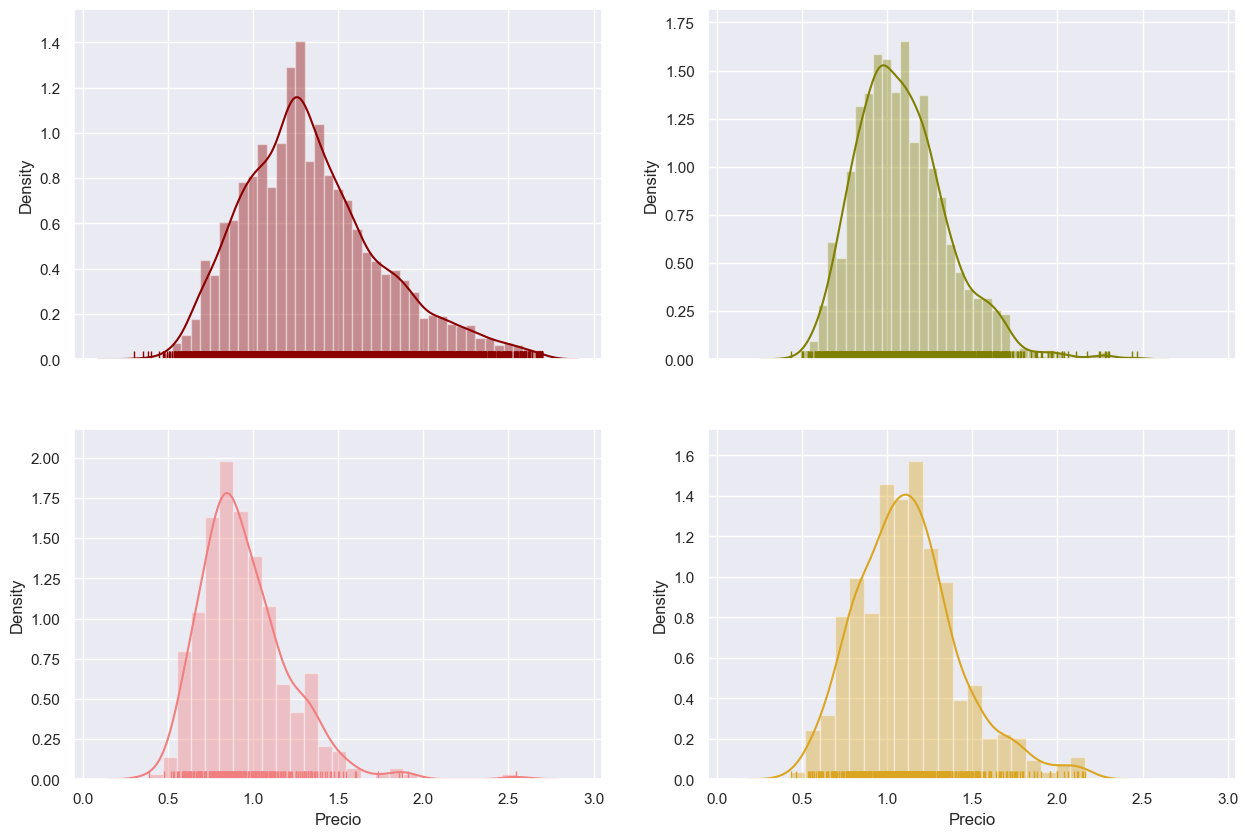

In [29]:
''' Vemos cómo la mayor varianza en los precios de los tintos se corresponde con 
    una base de la distribución de la densidad más ancha'''

f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)
sns.distplot(np.log10(vinos[vinos.Clase == "Tinto"]["Precio"]), color="darkred",rug=True, ax=axes[0, 0])
sns.distplot(np.log10(vinos[vinos.Clase == "Blanco"]["Precio"]), color="olive",rug=True, ax=axes[0, 1])
sns.distplot(np.log10(vinos[vinos.Clase == "Rosado"]["Precio"]), color="lightcoral",rug=True, ax=axes[1, 0])
sns.distplot(np.log10(vinos[vinos.Clase == "Espumoso"]["Precio"]), color="goldenrod",rug=True, ax=axes[1, 1]);

In [9]:
# Relacionamos el precio con el rating según el tipo de vino

dftinto = vinos[vinos.Clase == "Tinto"]
dfblanco = vinos[vinos.Clase == "Blanco"]
dfrosado = vinos[vinos.Clase == "Rosado"]
dfespumoso = vinos[vinos.Clase == "Espumoso"]

trace1 =go.Scatter(
                    x = dftinto.Rating,
                    y = dftinto.Precio,
                    mode = "markers",
                    name = "Tinto",
                    marker = dict(color = 'rgba(109, 33, 33, 1)'),
                    text= dftinto.Vino)

trace2 =go.Scatter(
                    x = dfblanco.Rating,
                    y = dfblanco.Precio,
                    mode = "markers",
                    name = "Blanco",
                    marker = dict(color = 'rgba(224, 253, 129, 1)'),
                    text= dfblanco.Vino)

trace3 =go.Scatter(
                    x = dfrosado.Rating,
                    y = dfrosado.Precio,
                    mode = "markers",
                    name = "Rosado",
                    marker = dict(color = 'rgba(253, 129, 166, 1)'),
                    text= dfrosado.Vino)

trace4 =go.Scatter(
                    x = dfespumoso.Rating,
                    y = dfespumoso.Precio,
                    mode = "markers",
                    name = "Espumoso",
                    marker = dict(color = 'rgba(129, 180, 253, 1)'),
                    text= dfespumoso.Vino)

data = [trace1, trace2, trace3, trace4]

layout = dict(title = 'PRECIO vs RATING según cada clase de vino',
              xaxis= dict(title= 'Rating',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Precio',ticklen= 5,zeroline= False)
             )

fig = go.Figure(dict(data = data, layout = layout))
iplot(fig)

In [10]:
fig.write_html("precio VS rating.html")

In [31]:
#########################################################################################################
### FILTRO 2º ###
#########################################################################################################

'''Una vez que hemos filtrado los vinos en cuanto a una calidad sólida y suficiente, vamos a establecer
    un máximo de precio; pues, si el vino es bueno ¿por qué pagar más?
    
    El valor máximo que estableceremos dependerá de la distribución de precios por cada clase de vino:
            máx. precio = q3 + 1.5*IQR '''

#############    Cálculo del máximo precio    ######################
# TINTOS
q3_pretin = np.percentile(vinos[vinos.Clase == "Tinto"]["Precio"],75) 
q1_pretin = np.percentile(vinos[vinos.Clase == "Tinto"]["Precio"],25)
IQR_pretin = q3_pretin - q1_pretin
maxi_pretin = q3_pretin + (1.5*IQR_pretin)

# BLANCOS
q3_prebla = np.percentile(vinos[vinos.Clase == "Blanco"]["Precio"],75) 
q1_prebla = np.percentile(vinos[vinos.Clase == "Blanco"]["Precio"],25)
IQR_prebla = q3_prebla - q1_prebla
maxi_prebla = q3_prebla + (1.5*IQR_prebla)

# ROSADOS
q3_preros = np.percentile(vinos[vinos.Clase == "Rosado"]["Precio"],75) 
q1_preros = np.percentile(vinos[vinos.Clase == "Rosado"]["Precio"],25)
IQR_preros = q3_preros - q1_preros
maxi_preros = q3_preros + (1.5*IQR_preros)

# ESPUMOSOS
q3_preesp = np.percentile(vinos[vinos.Clase == "Espumoso"]["Precio"],75) 
q1_preesp = np.percentile(vinos[vinos.Clase == "Espumoso"]["Precio"],25)
IQR_preesp = q3_preesp - q1_preesp
maxi_preesp = q3_preesp + (1.5*IQR_preesp)

########################## Filtrado ####################################
filtro_tintos = filtro_tintos[filtro_tintos.Precio < maxi_pretin]
filtro_blancos = filtro_blancos[filtro_blancos.Precio < maxi_prebla]
filtro_rosados = filtro_rosados[filtro_rosados.Precio < maxi_preros]
filtro_espumosos = filtro_espumosos[filtro_espumosos.Precio < maxi_preesp]


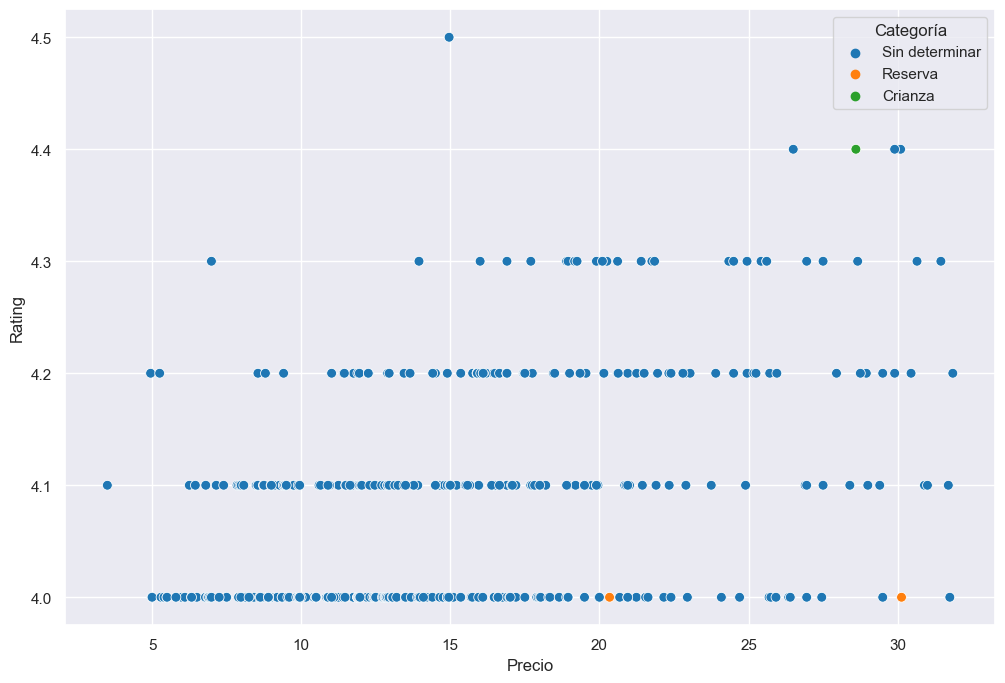

In [42]:
''' 
Ahora que hemos filtrado por precio, veamos la relación entre la CATEGORÍA del vino con el precio y el rating.
Para ello, hacemos un scatter plot.
Especialmente interesante esta relación en los tintos y espumosos, ya que son en estas dos clases de vino 
en las que la categoría cobra una mayor relevancia.
'''
# BLANCOS
plt.figure(figsize=(12,8))
sns.set(palette="tab10", color_codes=True)

sns.scatterplot(x = filtro_blancos.Precio,
                y = filtro_blancos.Rating,
                s = 50,
                hue = filtro_blancos["Categoría"]);


In [45]:
# TINTOS

gran_reserva = filtro_tintos[filtro_tintos["Categoría"] == "Gran Reserva"]
reserva = filtro_tintos[filtro_tintos["Categoría"]=="Reserva"]
crianza = filtro_tintos[filtro_tintos["Categoría"]=="Crianza"]
roble = filtro_tintos[filtro_tintos["Categoría"]=="Roble"]
joven = filtro_tintos[filtro_tintos["Categoría"]=="Joven"]

trace1 =go.Scatter(
                    x = gran_reserva.Precio,
                    y = gran_reserva.Rating,
                    mode = "markers",
                    name = "Gran Reserva",
                    marker = dict(color = 'rgba(109, 33, 33, 1)'),
                    text= gran_reserva.Vino)

trace2 =go.Scatter(
                    x = reserva.Precio,
                    y = reserva.Rating,
                    mode = "markers",
                    name = "Reserva",
                    marker = dict(color = 'rgba(8, 149, 121, 1)'),
                    text= reserva.Vino)

trace3 =go.Scatter(
                    x = crianza.Precio,
                    y = crianza.Rating,
                    mode = "markers",
                    name = "Crianza",
                    marker = dict(color = 'rgba(200, 117, 8, 1)'),
                    text= crianza.Vino)

trace4 =go.Scatter(
                    x = roble.Precio,
                    y = roble.Rating,
                    mode = "markers",
                    name = "Roble",
                    marker = dict(color = 'rgba(228, 112, 213, 1)'),
                    text= roble.Vino)

trace5 =go.Scatter(
                    x = joven.Precio,
                    y = joven.Rating,
                    mode = "markers",
                    name = "Joven",
                    marker = dict(color = 'rgba(227, 32, 71, 1)'),
                    text= joven.Vino)

data = [trace1, trace2, trace3, trace4, trace5]

layout = dict(title = 'PRECIO vs RATING según CATEGORÍA de tinto',
              xaxis= dict(title= 'Precio',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Rating',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

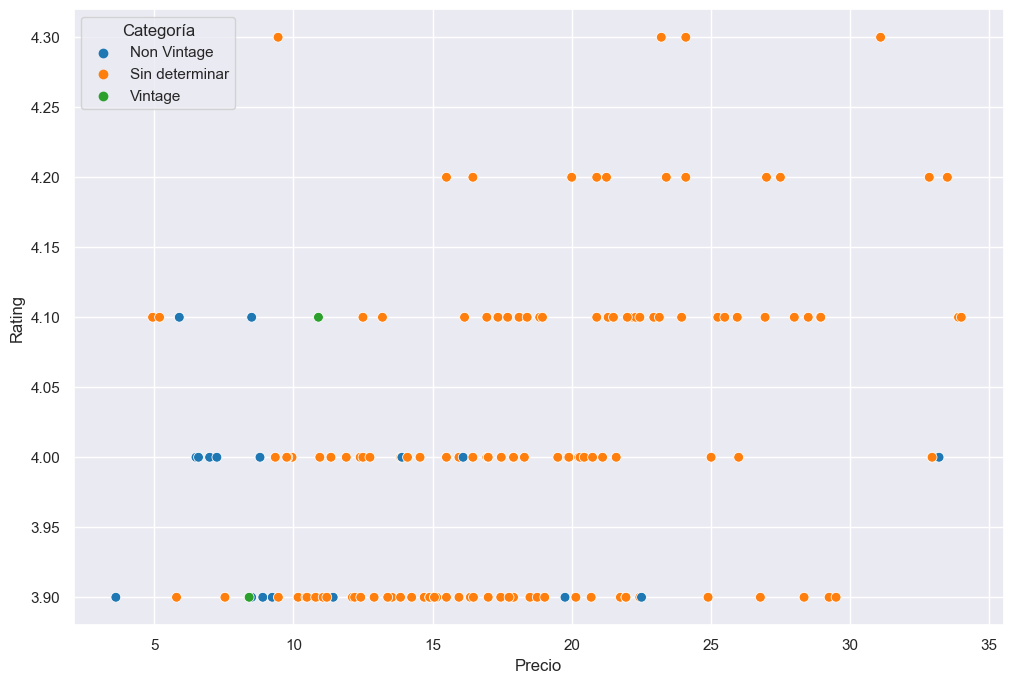

In [44]:
# ESPUMOSOS
''' Nos saltamos rosados, pues todos son de categoría "Sin determinar" '''

plt.figure(figsize=(12,8))
sns.set(palette="tab10", color_codes=True)

sns.scatterplot(x = filtro_espumosos.Precio,
                y = filtro_espumosos.Rating,
                s = 50,
                hue = filtro_espumosos["Categoría"]);

In [11]:
##########################################################################################################
#####################################  POPULARIDAD Y FAMA  ###############################################
##########################################################################################################

''' Para finalizar nuestro análisis y filtrado de datos, tratamos ahora la popularidad y la fama.
    Evidentemente, tanto una como la otra son valoraciones subjetivas y aunque ninguno de estos 2 factores
    te aseguran un buen producto, bien es sabido que a la hora de elegir vino para un evento o para un regalo
    tanto la región de procedencia como la bodega pueden predisponer un trato de favor por parte del público.

    Por tanto, partiendo de datos objetivos, como el nº de valoraciones o el rating de bodegas, intentaremos
    llegar a una valoración subjetiva acerca de la fama y popularidad de los vinos.
'''

# Vemos primero la diferencia entre presencia en el mercado y popularidad entre los usuarios de la web Vivino
# Consumo elevado de espumoso en relación a su presencia en el mdo: TODOS consumimos espumoso en determinados eventos y fechas
clases = vinos.groupby("Clase")[["Vino"]].count().sort_values(by="Vino", ascending=False).reset_index()
resenas = vinos.groupby("Clase")[["Nº_reseñas"]].sum().sort_values(by="Nº_reseñas",ascending=False).reset_index()
df = pd.merge(clases,resenas)

trace1 = go.Bar(x = df['Clase'],
                y = df['Vino'],
                name = 'Vinos por clase',
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                line = dict(color='rgb(0,0,0)', width = 1.5)))

trace2 = go.Bar(x = df['Clase'],
               y = df['Nº_reseñas']/1000,
               name = 'Popularidad de cada clase',
               marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)))

data = [trace1, trace2]

layout = go.Layout(barmode = "group")

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [12]:
fig.write_html("popularidad por clase.html")

In [56]:
vinos.groupby("Clase")["Nº_reseñas"].describe()

,count,mean,std,min,25%,50%,75%,max
Clase,,,,,,,,
Blanco,1988.0,169.904930,421.646005,25.0,41.00,75.0,154.00,9352.0
Espumoso,618.0,569.411003,1793.892506,25.0,50.25,116.0,346.25,20322.0
Rosado,347.0,117.066282,144.606757,25.0,38.00,64.0,122.00,961.0
Tinto,6453.0,410.690067,1177.711201,25.0,53.00,112.0,306.00,39460.0


In [57]:
#########################################################################################################
###  FILTRO 3º  ###
#########################################################################################################

"Popularidad de la región"

'''Dadas las diferencias entre clases de vino, 
    vamos a evaluar la popularidad de las regiones según las distintas clases'''

## POPULARIDAD
regiones_populares = vinos.groupby(["Clase","Región"])["Nº_reseñas"].aggregate([sum,np.median]).sort_values(by="sum", ascending=False)

regiones_tinto = regiones_populares.groupby("Clase").get_group("Tinto").reset_index().loc[:19,"Región":]
regiones_tinto = regiones_tinto[regiones_tinto["median"].values > dftinto["Nº_reseñas"].median()]

regiones_blanco = regiones_populares.groupby("Clase").get_group("Blanco").reset_index().loc[:19,"Región":]
regiones_blanco = regiones_blanco[regiones_blanco["median"].values > dfblanco["Nº_reseñas"].median()]

regiones_rosado = regiones_populares.groupby("Clase").get_group("Rosado").reset_index().loc[:19,"Región":]
regiones_rosado = regiones_rosado[regiones_rosado["median"].values > dfrosado["Nº_reseñas"].median()]

regiones_espumoso = regiones_populares.groupby("Clase").get_group("Espumoso").reset_index().loc[:19,"Región":]
regiones_espumoso = regiones_espumoso[regiones_espumoso["median"].values > dfespumoso["Nº_reseñas"].median()]

############################# Filtrado ##################################
# TINTOS
filtro_tintos = filtro_tintos[filtro_tintos["Región"].isin(regiones_tinto["Región"].values)]

# BLANCOS
filtro_blancos = filtro_blancos[filtro_blancos["Región"].isin(regiones_blanco["Región"].values)]

# ROSADOS
filtro_rosados = filtro_rosados[filtro_rosados["Región"].isin(regiones_rosado["Región"].values)]

# ESPUMOSOS
filtro_espumosos = filtro_espumosos[filtro_espumosos["Región"].isin(regiones_espumoso["Región"].values)]

In [63]:
#########################################################################################################
####  FILTRO 4º  ####
#########################################################################################################

'''Fama de acuerdo al rating de la bodega'''
# vamos a intentar que quede un top 10 para cada tipo de vino, de modo que el usuario pueda elegir en base a su propio sesgo/criterio/gusto

bodegas_valoradas = vinos.groupby(["Clase","Bodega"])[["Rating"]].median().sort_values(by="Rating", ascending=False)

# TINTOS
bodegas_tinto = bodegas_valoradas.groupby("Clase").get_group("Tinto").reset_index().loc[:19,"Bodega":]
best_tintos_precio = filtro_tintos[filtro_tintos["Bodega"].isin(bodegas_tinto.Bodega.values)].sort_values(by="Precio")[:20]
best_tintos_rating = filtro_tintos[filtro_tintos["Bodega"].isin(bodegas_tinto.Bodega.values)].sort_values(by="Rating", ascending = False)[:20]
top_tintos = pd.merge(best_tintos_precio,best_tintos_rating, how="inner").loc[:,"Bodega":]
top_tintos = top_tintos.set_index(np.arange(1,len(top_tintos)+1))
top_tintos

,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
1,Pago de Carraovejas,2016,1139434,Tinto 2016,4.5,7623,29.80,Ribera del Duero,Reserva,Denominación de Origen
2,Bodegas El Nido,2016,1219218,Clio 2016,4.5,2259,31.75,Jumilla,Reserva,Denominación de Origen
3,Bodegas El Nido,2015,1219218,Clio 2015,4.5,2756,33.20,Jumilla,Reserva,Denominación de Origen
4,Alto Moncayo,2017,98782,Garnacha 2017,4.5,1567,33.50,Campo de Borja,Crianza,Denominación de Origen


In [64]:
# BLANCOS
bodegas_blanco = bodegas_valoradas.groupby("Clase").get_group("Blanco").reset_index().loc[:19,"Bodega":]
best_blancos_precio = filtro_blancos[filtro_blancos["Bodega"].isin(bodegas_blanco.Bodega.values)].sort_values(by="Precio")[:20]
best_blancos_rating = filtro_blancos[filtro_blancos["Bodega"].isin(bodegas_blanco.Bodega.values)].sort_values(by="Rating", ascending = False)[:20]
top_blancos = pd.merge(best_blancos_precio,best_blancos_rating, how="inner").loc[:,"Bodega":]
top_blancos = top_blancos.set_index(np.arange(1,len(top_blancos)+1))
top_blancos

,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
1,Veigamoura,2013,2380009,Blanco 2013,4.5,45,14.96,Rías Baixas,Sin determinar,Denominación de Origen
2,Belondrade,2021,2929881,Quinta Apolonia 2021,4.0,72,15.70,Castilla y León,Sin determinar,Sin denominación
3,Rafael Palacios,2021,1620143,Louro Godello 2021,4.2,647,17.48,Valdeorras,Sin determinar,Denominación de Origen
4,Allende,2017,77131,Rioja Blanco 2017,4.0,249,18.90,Rioja,Sin determinar,Denominación de Origen
5,Tomás Postigo,2018,1553003,Fermentado En Barrica Blanco 2018,4.3,221,20.25,Castilla y León,Sin determinar,Sin denominación
6,Ossian,2019,6142915,Viñas Viejas Verdejo 2019,4.3,657,25.61,Castilla y León,Sin determinar,Sin denominación
7,Ossian,2018,6142915,Viñas Viejas Verdejo 2018,4.3,1002,25.61,Castilla y León,Sin determinar,Sin denominación
8,Remírez de Ganuza,2019,3183419,Rioja Blanco 2019,4.4,229,26.50,Rioja,Sin determinar,Denominación de Origen


In [66]:
# ROSADOS
bodegas_rosado = bodegas_valoradas.groupby("Clase").get_group("Rosado").reset_index().loc[:19,"Bodega":]
best_rosados_precio = filtro_rosados[filtro_rosados["Bodega"].isin(bodegas_rosado.Bodega.values)].sort_values(by="Precio")[:20]
best_rosados_rating = filtro_rosados[filtro_rosados["Bodega"].isin(bodegas_rosado.Bodega.values)].sort_values(by="Rating", ascending = False)[:20]
top_rosados = pd.merge(best_rosados_precio,best_rosados_rating, how="inner").loc[:,"Bodega":]
top_rosados = top_rosados.set_index(np.arange(1,len(top_rosados)+1))
top_rosados

,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
1,Sinforiano,2021,1563481,Sinfo Rosado 2021,4.1,43,4.25,Cigales,Sin determinar,Denominación de Origen
2,Muga,2020,7490,Muga Rosado 2020,3.8,876,7.30,Rioja,Sin determinar,Denominación de Origen
3,Altanza,2020,6262054,Alma Bohemia Rosé 2020,4.1,43,7.95,Rioja,Sin determinar,Denominación de Origen
4,Sinforiano,2021,5610625,Quelías Rosé 2021,4.1,77,7.99,Cigales,Sin determinar,Denominación de Origen
5,Muga,2021,7490,Muga Rosado 2021,3.9,406,8.75,Rioja,Sin determinar,Denominación de Origen
6,Muga,2021,5513425,Flor de Muga Rosado 2021,4.1,109,17.82,Rioja,Sin determinar,Denominación de Origen
7,Cillar de Silos,2020,5959277,Dominio del Pidio Rosado 2020,4.1,64,19.95,Ribera del Duero,Sin determinar,Denominación de Origen
8,Muga,2019,5513425,Flor de Muga Rosado 2019,4.1,323,19.95,Rioja,Sin determinar,Denominación de Origen
9,Jose Luis Ripa,2017,8643220,Rosado 2017,4.1,56,20.90,Rioja,Sin determinar,Denominación de Origen


In [67]:
# ESPUMOSOS
bodegas_espumoso = bodegas_valoradas.groupby("Clase").get_group("Espumoso").reset_index().loc[:19,"Bodega":]
best_espumosos_precio = filtro_espumosos[filtro_espumosos["Bodega"].isin(bodegas_espumoso.Bodega.values)].sort_values(by="Precio")[:20]
best_espumosos_rating = filtro_espumosos[filtro_espumosos["Bodega"].isin(bodegas_espumoso.Bodega.values)].sort_values(by="Rating", ascending = False)[:20]
top_espumosos = pd.merge(best_espumosos_precio,best_espumosos_rating, how="inner").loc[:,"Bodega":]
top_espumosos = top_espumosos.set_index(np.arange(1,len(top_espumosos)+1))
top_espumosos


,Bodega,Año,Vino_ID,Vino,Rating,Nº_reseñas,Precio,Región,Categoría,Sello_calidad
1,Juvé & Camps,2013,1622570,Cava Gran Reserva Brut 2013,4.1,153,4.94,Cava,Sin determinar,Denominación de Origen
2,Miquel Pons,2015,1394624,Cava Gran Reserva Vintage Brut Nature 2015,4.1,63,10.90,Cava,Vintage,Denominación de Origen
3,Guilera,2010,1851083,Gran Reserva Brut Nature 2010,4.1,57,12.50,Cava,Sin determinar,Denominación de Origen
4,Pago de Tharsys,2018,1295891,Cava Millésime Brut Reserva 2018,4.2,54,15.50,Cava,Sin determinar,Denominación de Origen
5,Dominio de la Vega,2015,1454604,Cava Reserva Especial Brut 2015,4.1,171,18.11,Cava,Sin determinar,Denominación de Origen
6,Dominio de la Vega,2017,1454604,Cava Reserva Especial Brut 2017,4.1,104,18.11,Cava,Sin determinar,Denominación de Origen
7,Gramona,2016,1199954,Imperial Brut 2016,4.1,947,18.85,Cava,Sin determinar,Denominación de Origen
8,Mestres,2013,2181578,Visol Gran Reserva Brut Nature 2013,4.2,250,20.00,Cava,Sin determinar,Denominación de Origen
9,Juvé & Camps,2016,9125117,Cava Gran Reserva Brut Nature Singular Xarel-l...,4.1,94,21.50,Cava,Sin determinar,Denominación de Origen
10,Hispano Suizas,2016,1797114,Cava Tantum Ergo Pinot Noir Brut Nature 2016,4.1,97,22.00,Cava,Sin determinar,Denominación de Origen
